In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df_stroke = pd.read_csv("stroke_full.csv")
df_heart_disease = pd.read_csv("heart_disease_full.csv")
df_hypertension = pd.read_csv("hypertension_full.csv")

In [6]:
df_stroke['heart_risk'] = (df_stroke['hypertension'] | df_stroke['heart_disease']).astype(int)

Encoding categorical features.

In [7]:
# One-Hot Encoding for categorical features.
# One-Hot Encoding using pd.get_dummies.
df = pd.get_dummies(df_stroke, columns=['work_type', 'smoking_status', 'gender','ever_married', 'Residence_type'], drop_first=True)

# Check the transformed data
print(df.head())

   age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0   67             0              1             228.69  36.6       1   
1   61             0              0             202.21  28.8       1   
2   80             0              1             105.92  32.5       1   
3   49             0              0             171.23  34.4       1   
4   79             1              0             174.12  24.0       1   

   heart_risk  work_type_Private  work_type_Self-employed  \
0           1               True                    False   
1           0              False                     True   
2           1               True                    False   
3           0               True                    False   
4           1              False                     True   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                            True                        False   
1                           False                         True   
2 

Standardize the numerical columns (age, avg_glucose_level, and bmi).

In [8]:
# Feature scaling on the numerical columns (age, avg_glucose_level, and bmi) using the StandardScaler from the sklearn.preprocessing module. 
# This is a preprocessing step to standardize the data so that each feature has a mean of 0 and a standard deviation of 1.

from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Scale numerical features: age, avg_glucose_level, bmi
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

# Check the scaled data
print(df[['age', 'avg_glucose_level', 'bmi']].head())

        age  avg_glucose_level       bmi
0  0.763532           2.312038  0.887420
1  0.343728           1.787070 -0.305926
2  1.673108          -0.121883  0.260149
3 -0.495881           1.172891  0.550835
4  1.603141           1.230185 -1.040292


In [9]:
df = df[['age', 'avg_glucose_level', 'heart_risk', 'stroke']]
df.head(3)

,age,avg_glucose_level,heart_risk,stroke
0,0.763532,2.312038,1,1
1,0.343728,1.787070,0,1
2,1.673108,-0.121883,1,1


In [10]:
df.columns

Index(['age', 'avg_glucose_level', 'heart_risk', 'stroke'], dtype='object')

In [11]:
# split the data into a training and testing set. 
from sklearn.model_selection import train_test_split

# set a seed for reproducibility
np.random.seed(123)

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('stroke', axis=1), df["stroke"], train_size=0.75, shuffle=True, stratify=df["stroke"]
)

In [12]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Create an instance of SMOTE
smote = SMOTE()

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 2374, 1: 185})
After SMOTE: Counter({0: 2374, 1: 2374})


LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=500)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

Accuracy: 0.9274

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       792
           1       0.00      0.00      0.00        62

    accuracy                           0.93       854
   macro avg       0.46      0.50      0.48       854
weighted avg       0.86      0.93      0.89       854



/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

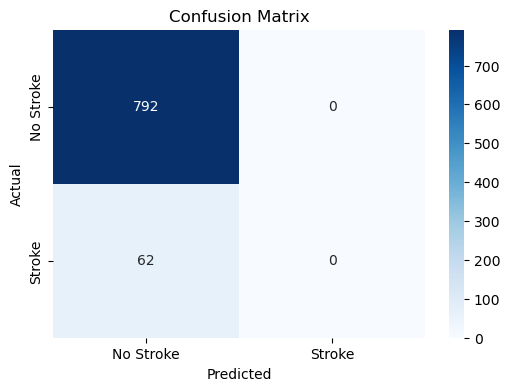

In [14]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Display confusion matrix
#print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

LogisticRegression + SMOTE

Accuracy: 0.6979

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.69      0.81       792
           1       0.17      0.81      0.28        62

    accuracy                           0.70       854
   macro avg       0.57      0.75      0.54       854
weighted avg       0.92      0.70      0.77       854



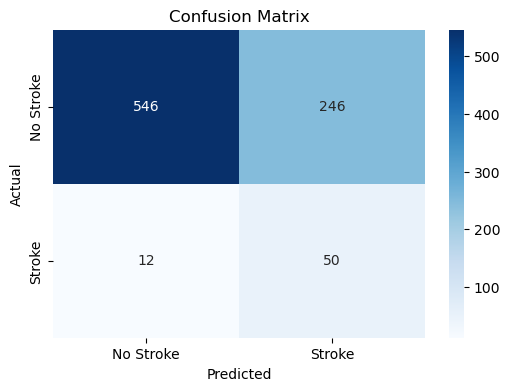

In [15]:
model_lr.fit(X_train_smote, y_train_smote)
y_pred_lrs = model_lr.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lrs)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_lrs))

# Display confusion matrix
#print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred_lrs)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 0.6967

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.69      0.81       792
           1       0.17      0.81      0.28        62

    accuracy                           0.70       854
   macro avg       0.57      0.75      0.54       854
weighted avg       0.92      0.70      0.77       854



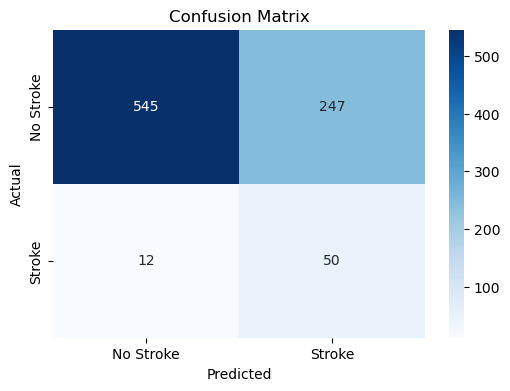

In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for class_weight and max_iter
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'saga']  # Range of max_iter values
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model_lr, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the GridSearchCV
grid_search.fit(X_train_smote, y_train_smote)

# Print the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Get the best model from GridSearchCV
best_model_lr = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_lrs= best_model_lr.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lrs)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_lrs))

# Display confusion matrix
#print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred_lrs)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

LogisticRegression(class_weight="balanced")

Accuracy: 0.6920

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.68      0.80       792
           1       0.17      0.81      0.28        62

    accuracy                           0.69       854
   macro avg       0.57      0.74      0.54       854
weighted avg       0.92      0.69      0.77       854



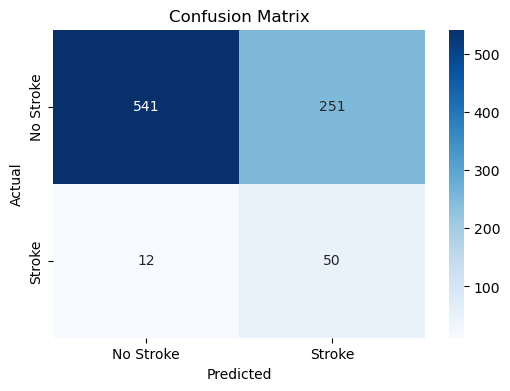

In [17]:
model_lrb = LogisticRegression(class_weight="balanced")
model_lrb.fit(X_train, y_train)
y_pred_lrb = model_lrb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lrb)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_lrb))

# Display confusion matrix
#print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred_lrb)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best hyperparameters: {'class_weight': {0: 1, 1: 5}, 'max_iter': 100}
Accuracy: 0.8630

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       792
           1       0.24      0.42      0.31        62

    accuracy                           0.86       854
   macro avg       0.60      0.66      0.62       854
weighted avg       0.90      0.86      0.88       854



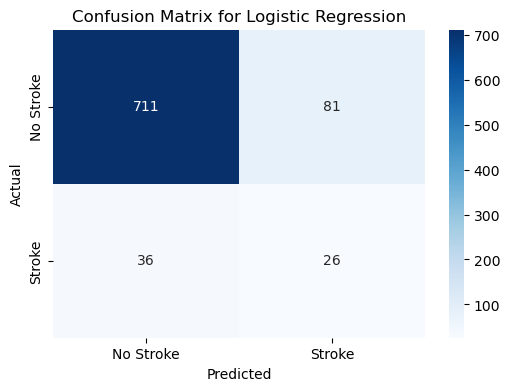

In [18]:
# Define the parameter grid for class_weight and max_iter
param_grid = {
    'class_weight': [{0: 1, 1: 5}, {0: 1, 1: 10}, {0: 1, 1: 50}, {0: 1, 1: 100}, {0: 1, 1: 500}, {0: 1, 1: 1000}],
    'max_iter': [100, 200, 500, 1000]   # Range of max_iter values
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model_lrb, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Get the best model from GridSearchCV
best_model_lrb = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_lrb= best_model_lrb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lrb)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lrb))

# Display confusion matrix
#print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred_lrb)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf_classifier = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, class_weight='balanced')

# Train (fit) the model on the training data
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='recall',           
    cv=5
)

grid_search.fit(X_train, y_train)  
print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.06486486486486487


In [22]:
rf_classifier = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, class_weight='balanced')

# Train (fit) the model on the training data
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

Accuracy: 0.9169

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       792
           1       0.29      0.10      0.14        62

    accuracy                           0.92       854
   macro avg       0.61      0.54      0.55       854
weighted avg       0.89      0.92      0.90       854



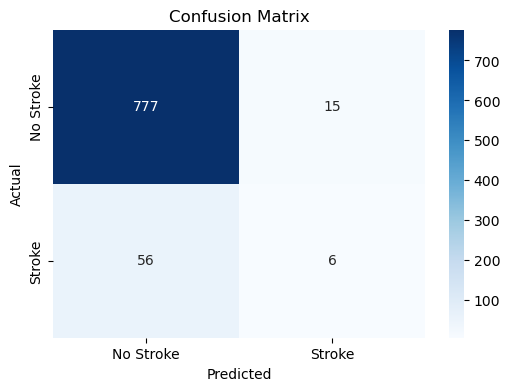

In [23]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Display confusion matrix
#print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

BalancedRandomForestClassifier

In [24]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(X_train, y_train)

y_pred_brf = brf.predict(X_test)

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence t

Accuracy: 0.6417

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.63      0.76       792
           1       0.15      0.81      0.25        62

    accuracy                           0.64       854
   macro avg       0.56      0.72      0.51       854
weighted avg       0.92      0.64      0.73       854



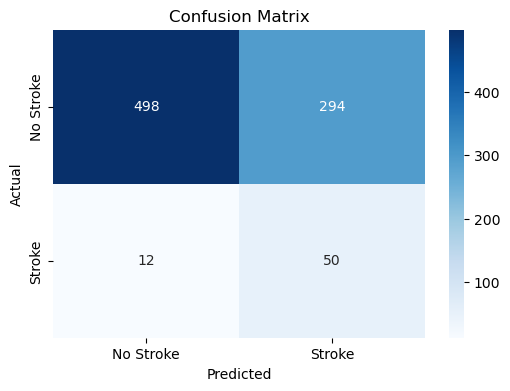

In [25]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_brf)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_brf))

# Display confusion matrix
#print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred_brf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()